

# Power Production Project for *Fundamentals of Data Analysis* at GMIT
by Radek Wojtczak G00352936<br>


**Instructions:**

>In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
>1. Jupyter notebook that performs simple linear regression on the data set.
>2. In that notebook, an explanation of your regression and an analysis of its accuracy.
>3. Standard items in a git repository such as a README.

>To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set.


# Wind power



**How does a wind turbine work?**

Wind turbines can turn the power of wind into the electricity we all use to power our homes and businesses. They can be stand-alone, supplying just one or a very small number of homes or businesses, or they can be clustered to form part of a wind farm. 

The visible parts of the wind farm that we’re all used to seeing – those towering white or pale grey turbines. Each of these turbines consists of a set of blades, a box beside them called a nacelle and a shaft. The wind – and this can be just a gentle breeze – makes the blades spin, creating kinetic energy. The blades rotating in this way then also make the shaft in the nacelle turn and a generator in the nacelle converts this kinetic energy into electrical energy.

![How it works](img/works.jpg) 

**What happens to the wind-turbine generated electricity next?**

To connect to the national grid, the electrical energy is then passed through a transformer on the site that increases the voltage to that used by the national electricity system. It’s at this stage that the electricity usually moves onto the National Grid transmission network, ready to then be passed on so that, eventually, it can be used in homes and businesses. Alternatively, a wind farm or a single wind turbine can generate electricity that is used privately by an individual or small set of homes or businesses.
 

**How strong does the wind need to be for a wind turbine to work?**

Wind turbines can operate in anything from very light to very strong wind speeds. They generate around 80% of the time, but not always at full capacity. In really high winds they shut down to prevent damage.

![Frequency](img/freq.png)

**Where are wind farms located?**

Wind farms tend to be located in the windiest places possible, to maximise the energy they can create – this is why you’ll be more likely to see them on hillsides or at the coast. Wind farms that are in the sea are called offshore wind farms, whereas those on dry land are termed onshore wind farms.

**Wind energy in Ireland**

Wind energy is currently the largest contributing resource of renewable energy in Ireland. It is both Ireland’s largest and cheapest renewable electricity resource. In 2018 Wind provided 85% of Ireland’s renewable electricity and 30% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas. Ireland is one of the leading countries in its use of wind energy and 3rd place worldwide in 2018, after Denmark and Uruguay.

![Windfarms in Ireland](img/map.jpg)

### Exploring dataset:

In [1]:
# importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

In [2]:
# loading our dataset, seting columns names and changing index to start from 1 instead of 0
df = pd.read_csv('dataset/powerproduction.txt', sep=",", header=None)
df.columns = ["speed", "power"]
df = df[1:]
df

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
496,24.775,0.000
497,24.850,0.000
498,24.875,0.000
499,24.950,0.000


In [3]:
# checking for nan values
count_nan = len(df) - df.count()
count_nan

speed    0
power    0
dtype: int64

In [4]:
# Converting Strings to Floats
df = df.astype(float)

In [5]:
# showing first 20 results
df.head(20)

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
6,0.325,4.331
7,0.400,5.186
8,0.450,3.826
9,0.501,1.048
10,0.526,5.553


In [6]:
# basic statistic of speed column
df['speed'].describe()

count    500.000000
mean      12.590398
std        7.224991
min        0.000000
25%        6.324750
50%       12.550500
75%       18.775250
max       25.000000
Name: speed, dtype: float64

In [7]:
# basic statistic of power column
df['power'].describe()

count    500.000000
mean      48.014584
std       41.614572
min        0.000000
25%        5.288000
50%       41.645500
75%       93.537000
max      113.556000
Name: power, dtype: float64

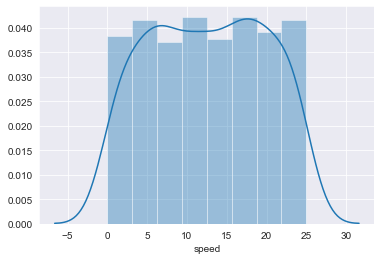

In [8]:
# histogram of 'speed' data
sns.set_style('darkgrid')
sns.distplot(df['speed'])
plt.show()

We can clearly see normal distribution in above 'speed' column data.

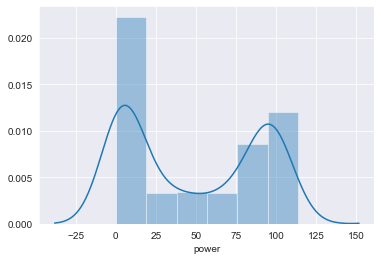

In [9]:
# histogram od 'power' data
sns.set_style('darkgrid')
sns.distplot(df['power'])
plt.show()

As we can see above this distribution look like bimodal distribution.

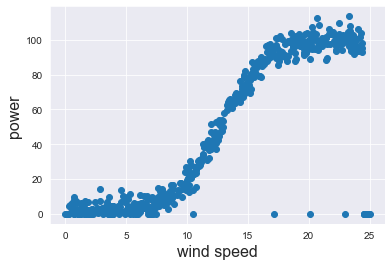

In [10]:
# scatter plot of our dataset
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(df['speed'],df['power'])
plt.show()

In [11]:
df

,speed,power
1,0.000,0.0
2,0.125,0.0
3,0.150,0.0
4,0.225,0.0
5,0.275,0.0
...,...,...
496,24.775,0.0
497,24.850,0.0
498,24.875,0.0
499,24.950,0.0


## Regression

Regression analysis is a set of statistical methods used for the estimation of relationships between a dependent variable and one or more independent variables. It can be utilized to assess the strength of the relationship between variables and for modeling the future relationship between them.


The term regression is used when you try to find the relationship between variables.

In Machine Learning, and in statistical modeling, that relationship is used to predict the outcome of future events.

## Linear Regression

The term “linearity” in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable. It looks for statistical relationship but not deterministic relationship. Relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. For example, using temperature in degree Celsius it is possible to accurately predict Fahrenheit. Statistical relationship is not accurate in determining relationship between two variables. For example, relationship between height and weight.
The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

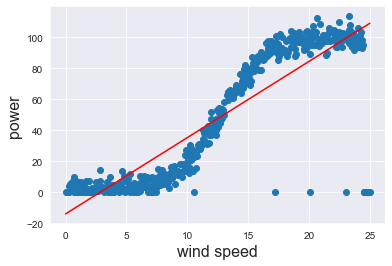

In [12]:
x = df['speed']
y = df['power']

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 25, 100)
yfit = model.predict(xfit[:, np.newaxis])

plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x, y)
plt.plot(xfit, yfit, color="red");

In [13]:
print("Parameters:", model.coef_, model.intercept_)
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Parameters: [4.91759567] -13.899902630519634
Model slope:     4.9175956654046695
Model intercept: -13.899902630519634


**Different approach: Simple linear regression model**

Fiting line helps to determine, if our model is predicting well on test dataset.
With help of a line we can calculate the error of each datapoint from a line on basis of how fare it is from the line.
Error could be +ve or -ve, and on basis of that we can calculate the cost function.
I have used Fitted Line Plot to display the relationship between one continuous predictor and a response. A fitted line plot shows a scatterplot of the data with a regression line representing the regression equation.

A best fitted line can be roughly determined using an eyeball method by drawing a straight line on a scatter plot so that the number of points above the line and below the line is about equal (and the line passes through as many points as possible).As we can see below our data,are a little bit sinusoidal and in this case best fitted line is trying to cover most of points that are on diagonal, but also it has to cover other data points so its little bit tweaked due to overestimation and underestimation.

I divided data into training and testing samples at ratio of 70-30%. After that I will apply different models to compare the accuracy scores of all models.

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df[['speed']],df.power,test_size = 0.3)

Simple linear regression model

In [15]:
reg_simple = lm.LinearRegression()
reg_simple.fit(x_train,y_train)

LinearRegression()

Best fit line on test dataset with simple linear regression

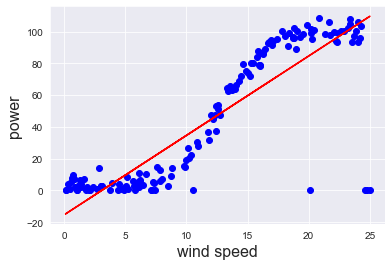

In [16]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_simple.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [17]:
reg_simple.coef_ #slope

array([5.00309403])

In [18]:
reg_simple.intercept_ #y-intercept

-15.426488232568353

In [19]:
reg_simple.score(x_test,y_test)

0.7250952283851242

## Ridge regression and classification

Ridge regression is an extension of linear regression where the loss function is modified to minimize the complexity of the model. This modification is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When
multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from
the true value. By adding a degree of bias to the regression estimates, ridge regression reduces the standard errors.
It is hoped that the net effect will be to give estimates that are more reliable

In [20]:
reg_ridge = lm.Ridge(alpha=.5)
reg_ridge.fit(x_train,y_train)

Ridge(alpha=0.5)

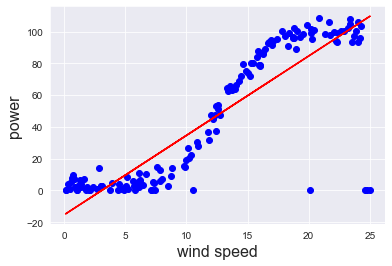

In [21]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridge.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [22]:
reg_ridge.coef_ #slope

array([5.00295063])

In [23]:
reg_ridge.intercept_ #y-intercept

-15.424641918747817

In [24]:
reg_ridge.score(x_test,y_test)

0.7250977110570258

**With regularization parameter.**

In [25]:
reg_ridgecv = lm.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg_ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]))

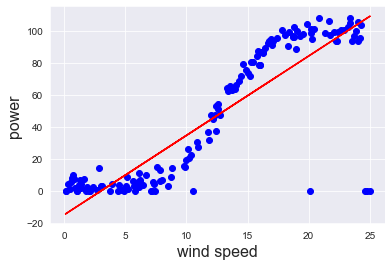

In [26]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_ridgecv.predict(x_test),color = 'r')
plt.show()

Slope, y-intercept and score of our predictions.

In [27]:
reg_ridgecv.coef_ #slope

array([4.97457696])

In [28]:
reg_ridgecv.intercept_ #y-intercept

-15.059319700737255

In [29]:
reg_ridgecv.score(x_test,y_test)

0.7255625131847951

# Lasso

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.

The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.

In [30]:
reg_lasso = lm.Lasso(alpha=0.1)
reg_lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

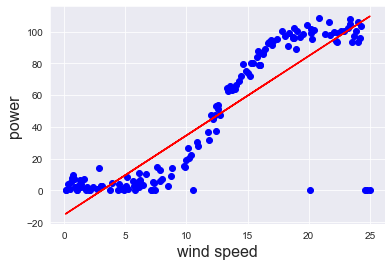

In [31]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lasso.predict(x_test),color = 'r')
plt.show()

## slope and y-intercept

In [32]:
reg_lasso.coef_ #slope

array([5.00108763])

In [33]:
reg_lasso.intercept_ #y-intercept

-15.400655083879478

In [34]:
reg_lasso.score(x_test,y_test)

0.7251298431789941

# LARS Lasso

In statistics, least-angle regression (LARS) is an algorithm for fitting linear regression models to high-dimensional data, developed by Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani.[1]

Suppose we expect a response variable to be determined by a linear combination of a subset of potential covariates. Then the LARS algorithm provides a means of producing an estimate of which variables to include, as well as their coefficients.

Instead of giving a vector result, the LARS solution consists of a curve denoting the solution for each value of the L1 norm of the parameter vector. The algorithm is similar to forward stepwise regression, but instead of including variables at each step, the estimated parameters are increased in a direction equiangular to each one's correlations with the residual.

In [35]:
reg_lars = lm.Lars(n_nonzero_coefs=1)
reg_lars.fit(x_train,y_train)

Lars(n_nonzero_coefs=1)

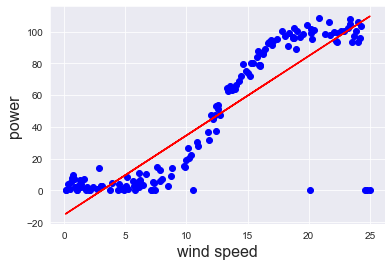

In [36]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,reg_lars.predict(x_test),color = 'r')
plt.show()

## Slope and y-intercept

In [37]:
reg_lars.coef_ #slope

array([5.00309403])

In [38]:
reg_lars.intercept_ #y-intercept

-15.426488232568367

In [39]:
reg_lars.score(x_test,y_test)

0.7250952283851242

**Accuracy** of all models are almost 78% and model having accuracy between 70% to 80% are considered as a good models.<br>
If score value is between 80% and 90%, then model is cosidered as excellent model. If score value is between 90% and 100%, it's a probably an overfitting case.

<img src="img/img2.png">


Above image explains over and under **estimation** of data, We can see in below image that how 
datapoints are overestimating and underestimating at some points



<img src="img/img_exp.png">



## Logistic Regression

Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

**Linear Regression Vs. Logistic Regression**

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Example's of the discrete output is predicting whether a patient has cancer or not, predicting whether the customer will churn. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

<img src="img/linlog.png">


In [40]:
logistic_regression = LogisticRegression(max_iter=5000)

In [41]:
from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[ 66  54 302  32 252  51 164 269   0  38 113 127 199 129   0 110 109  96
 229 318  85 203   0 182   7 288 148  44 223  28  50 236 154  95  70   0
 139 248 296 290 304  78 101 130  97  26 289   0 247 287 242  48   0 266
   0  99 262 105  92 278   0 235 270 165 169 294  52 301 123  42  20 205
  13 216 208 144 132 156  94 281 228 226 140 191 151 261 313 267 210 246
 315   0 297  98  81   9 108  89  74 174 211 200   0  55 237  45 168  76
  84 292 153 303 112 115 263 238 121 218  31 215 259  67 201 117 213 162
 255 272 310 192   2  18 234  83 275 146 276  62   0 251 286 158   0   0
  24   0 274 179  59 150   1  90 222  73 282 152 217 306  58 202  86  56
 196  14 155 309 134 224 142 175  22 125 241 254 225 232 264  47 160  65
  16 159   0 111 218 138 193 243  36  49 283  41 227 161  88   0   0  57
  46 240 305 257 149   3 167   0 214 317 300  64   0  68  37  17   0   0
  34 114 221  53 308 219 189  33 170 209 195 198 194 220  25 280 293 204
   8 316  21 128  61 171   0 166 277 181 106   4 12

In [42]:
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [43]:
logistic_regression.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [44]:
y_pred = logistic_regression.predict(x_test)

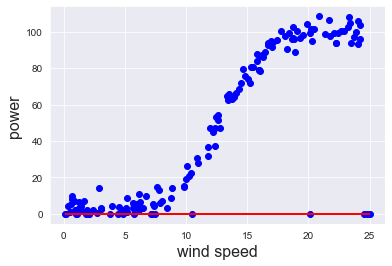

In [45]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,logistic_regression.predict_proba(x_test)[:,1],color = 'r')
plt.show()


In [46]:
logistic_regression.coef_.mean() #slope

-4.162537538618281e-11

In [47]:
logistic_regression.intercept_ .mean()#y-intercept

-9.266011851918548e-14

In [48]:
test_enc = preprocessing.LabelEncoder()
y_test_encoded = test_enc.fit_transform(y_test)
logistic_regression.score(x_test,y_test_encoded)

0.08

In [49]:
filter = df["power"]==0.0
filter


1      True
2      True
3      True
4      True
5      True
       ... 
496    True
497    True
498    True
499    True
500    True
Name: power, Length: 500, dtype: bool

In [50]:
# using enumerate() + list comprehension 
# to return true indices. 
res = [i for i, val in enumerate(filter) if val] 
  
# printing result 
print ("The list indices having True values are : " +  str(res))

The list indices having True values are : [0, 1, 2, 3, 4, 15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]


In [51]:
update = df.drop(df.index[[15, 16, 24, 26, 31, 35, 37, 39, 42, 43, 44, 47, 60, 65, 67, 70, 73, 74, 75, 83, 89, 105, 110, 111, 114, 133, 135, 136, 140, 149, 208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]])
update

,speed,power
1,0.000,0.000
2,0.125,0.000
3,0.150,0.000
4,0.225,0.000
5,0.275,0.000
...,...,...
486,24.249,103.700
487,24.299,93.694
488,24.349,93.078
489,24.374,98.223


In [52]:
x_train,x_test,y_train,y_test = train_test_split(update[['speed']],update.power,test_size = 0.3)

In [53]:
log = LogisticRegression(max_iter=5000)

In [54]:
lab_enc = preprocessing.LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)
print(y_train_encoded)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_train.astype('int')))
print(utils.multiclass.type_of_target(y_train_encoded))

[ 66 189  31   9  84 250 147  39 173 152 110 298 129 207 307 179   7 159
 301 311  44  85  70 278 234 270   0 137  37  69   8  59 145 214  67 186
 158 144 222 235  29 113 117  19 236  12 202 290 201  28 163 125 310 122
  30 279 316 127 292  62 260 184 212 221 140 283  87  47 273 132 109  73
 265 294 164  53  38 306 195 282  52  18 162 200 241 281 209 134 154 141
 149 118 208 305   1  21 245 287 169 248  32 138 116 223 148 314 228 284
 240  34 302 143  61 142  71 166 216 213  49 253 165  99  48  92 182  33
  88 101  50 229 277  72 115 244  97 303 227  83 155  98 267 259 238 167
 191 211 232   0 106  55 172 205 188 120 251  25 190 100 102  23 297 197
 194  36 171 196 254  80 193  10 128 133 170  14 187 157 121 123 304 108
  24 261 255 139 203  95  90 206 130 135 285 243 107  41  11 237 233  26
 217 126 263   2  86 226 242 119 225  65 178  79 230 315  15 180 168 293
 274 269 161  57  89  64  74 312 136  22 249 268  56 104  45 309  77 239
 174  16  43 275 295  96  68 204  76 276  54 192  4

In [55]:
log.fit(x_train, y_train_encoded)

LogisticRegression(max_iter=5000)

In [56]:
y_pred = log.predict_proba(x_test)[:,1]

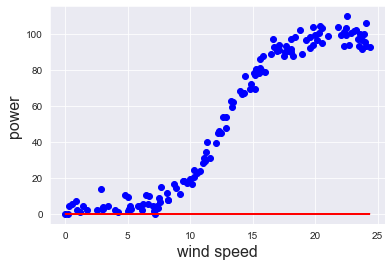

In [57]:
plt.xlabel('wind speed',fontsize = 16)
plt.ylabel('power',fontsize = 16)
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,log.predict_proba(x_test)[:,300],color = 'r')
plt.show()

**Logistic regression** is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.

It was very bad on our data with score below 0.05, even when I have tried to cut outliners.

In [65]:
# Training Polynomial Regression Model
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly, y_train)
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y_train)

LinearRegression()

In [68]:
# Predict Result with Polynomial Regression
lin_reg.predict(poly_reg.fit_transform(x_test))
lin_reg.predict(poly_reg.fit_transform(x_test))

array([-1.04061985e+00,  9.49967692e+01,  1.04602164e+02,  8.72628925e+00,
        2.82534926e+01,  3.69146567e+01,  7.30906590e+01,  8.20921062e+00,
        2.09594990e+00,  3.95698016e+01,  5.84763497e-02,  9.99982275e+01,
        6.07758967e+00, -5.88764181e-01,  4.33871245e+01,  9.75410603e+01,
        2.46219267e+00,  1.04924143e+02,  1.03306162e+02,  8.94413624e+00,
        2.23989813e+01,  3.27785218e+00,  5.12047992e+01,  3.66961653e+01,
        3.67594578e-01,  9.73106275e-02, -1.02443999e+00,  9.46859412e+01,
        1.75437526e+01,  9.29981256e+01,  6.12216330e+01,  1.32995231e+01,
        6.83679159e+01,  8.83383440e+01,  5.51586019e+01,  2.39150696e+01,
        3.05164874e+01,  1.04369941e+02,  5.34836522e-01,  1.05444467e+02,
        6.95027378e+01,  9.43483985e+01,  9.32291980e+01,  1.09574971e+01,
        2.16466425e+01,  1.03808135e+02,  3.18771942e+00, -3.80793282e-01,
        3.59709119e+00,  9.48417985e+01,  7.58037669e+00,  1.03310302e+02,
        2.00038803e+01,  

In [78]:
# Change into array
x = np.array(df['speed'])
y = np.array(df['power'])

In [79]:
# Changing the shape of array
x = x.reshape(-1,1)
y = y.reshape(-1,1)

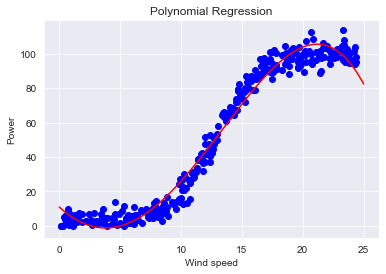

In [80]:
# Visualise the Results of Polynomial Regression
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Wind speed')
plt.ylabel('Power')
plt.show()

**References:**

- https://www.goodenergy.co.uk/media/1775/howawindturbineworks.jpg?width=640&height=&center=0.5,0.5&mode=crop

- https://www.nationalgrid.com/stories/energy-explained/how-does-wind-turbine-work

- https://www.pluralsight.com/guides/linear-lasso-ridge-regression-scikit-learn

- https://www.seai.ie/technologies/wind-energy/

- https://towardsdatascience.com/ridge-regression-python-example-f015345d936b

- https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

- https://realpython.com/linear-regression-in-python/

- https://en.wikipedia.org/wiki/Least-angle_regression

- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

- https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

- https://www.statisticshowto.com/lasso-regression/

- https://saskeli.github.io/data-analysis-with-python-summer-2019/linear_regression.html

- https://www.w3schools.com/python/python_ml_linear_regression.asp

- https://www.geeksforgeeks.org/linear-regression-python-implementation/

- https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html

- https://towardsdatascience.com/an-introduction-to-linear-regression-for-data-science-9056bbcdf675

- https://www.kaggle.com/ankitjha/comparing-regression-models

- https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

- https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python

- https://www.researchgate.net/post/Is_there_a_test_which_can_compare_which_of_two_regression_models_is_best_explains_more_variance

- https://heartbeat.fritz.ai/logistic-regression-in-python-using-scikit-learn-d34e882eebb1

- https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/